# Example to fit a parametric spectral model using the debiased Whittle likelihood


Use the global HYCOM data:
- https://www.nature.com/articles/s41597-024-03813-z
- https://github.com/selipot/hycom-oceantrack/blob/main/tutorials/hycom_eulerian_tutorial.ipynb

In [1]:
import glob
import xarray as xr
import matplotlib.pyplot as plt
from cmocean import cm
from s3fs import S3FileSystem, S3Map

# from functools import partial
from jax import numpy as np
# import jax 
import optax
import nonstat_itides_jax as nsjax

In [2]:
bucket_name = 'hycom-global-drifters'

s3 = S3FileSystem(anon=True)

# Get the objects in the Eulerian directory
directory = bucket_name + '/eulerian'
objects = s3.ls(directory)
# Print the objects
for obj in objects:
    print(obj)

hycom-global-drifters/eulerian/
hycom-global-drifters/eulerian/hycom12-1-rechunked-corr.zarr
hycom-global-drifters/eulerian/hycom12-10-rechunked-corr.zarr
hycom-global-drifters/eulerian/hycom12-11-rechunked-corr.zarr
hycom-global-drifters/eulerian/hycom12-12-rechunked-corr.zarr
hycom-global-drifters/eulerian/hycom12-2-rechunked-corr.zarr
hycom-global-drifters/eulerian/hycom12-3-rechunked-corr.zarr
hycom-global-drifters/eulerian/hycom12-4-rechunked-corr.zarr
hycom-global-drifters/eulerian/hycom12-5-rechunked-corr.zarr
hycom-global-drifters/eulerian/hycom12-6-rechunked-corr.zarr
hycom-global-drifters/eulerian/hycom12-7-rechunked-corr.zarr
hycom-global-drifters/eulerian/hycom12-8-rechunked-corr.zarr
hycom-global-drifters/eulerian/hycom12-9-rechunked-corr.zarr
hycom-global-drifters/eulerian/hycom12-ssh-1-rechunked-corr.zarr
hycom-global-drifters/eulerian/hycom12-ssh-10-rechunked-corr.zarr
hycom-global-drifters/eulerian/hycom12-ssh-11-rechunked-corr.zarr
hycom-global-drifters/eulerian/hycom

In [18]:
# Load all of the months into one object
ds_uv = []
for step in range(1,13):
    #print(step)
    zarr_velocity_store_path =f"{bucket_name}/eulerian/hycom12-{step}-rechunked-corr.zarr"
    store = S3Map(root=zarr_velocity_store_path, s3=s3)
    ds_uv.append(xr.open_zarr(store, consolidated="auto").isel(X=3000, Y=1000))

ds = xr.concat(ds_uv, dim='time')
ds

<xarray.Dataset>
Dimensions:    (Depth: 2, time: 8759)
Coordinates:
  * Depth      (Depth) float32 0.0 15.0
    X          int32 3001
    Y          int32 1001
  * time       (time) datetime64[ns] 2014-01-01T01:00:00 ... 2014-12-31T23:00:00
Data variables:
    Latitude   (time) float32 dask.array<chunksize=(720,), meta=np.ndarray>
    Longitude  (time) float32 dask.array<chunksize=(720,), meta=np.ndarray>
    u          (time, Depth) float32 dask.array<chunksize=(720, 1), meta=np.ndarray>
    v          (time, Depth) float32 dask.array<chunksize=(720, 1), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.0
    experiment:   10.2
    history:      archv2ncdf3z
    source:       HYCOM archive file
    title:        HYCOM

In [15]:
# %%time
# # Load the lat and lon into memory
# lat = ds_uv[0]['Latitude'].isel(
#                 X=slice(500,1500),
#                 Y=slice(2500, 3500)).compute()
# lat

In [19]:
# myds = ds.isel(X=3000, Y=1000)
myds = ds
myds

<xarray.Dataset>
Dimensions:    (Depth: 2, time: 8759)
Coordinates:
  * Depth      (Depth) float32 0.0 15.0
    X          int32 3001
    Y          int32 1001
  * time       (time) datetime64[ns] 2014-01-01T01:00:00 ... 2014-12-31T23:00:00
Data variables:
    Latitude   (time) float32 dask.array<chunksize=(720,), meta=np.ndarray>
    Longitude  (time) float32 dask.array<chunksize=(720,), meta=np.ndarray>
    u          (time, Depth) float32 dask.array<chunksize=(720, 1), meta=np.ndarray>
    v          (time, Depth) float32 dask.array<chunksize=(720, 1), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.0
    experiment:   10.2
    history:      archv2ncdf3z
    source:       HYCOM archive file
    title:        HYCOM

CPU times: user 4.11 s, sys: 1 s, total: 5.11 s
Wall time: 38min 57s


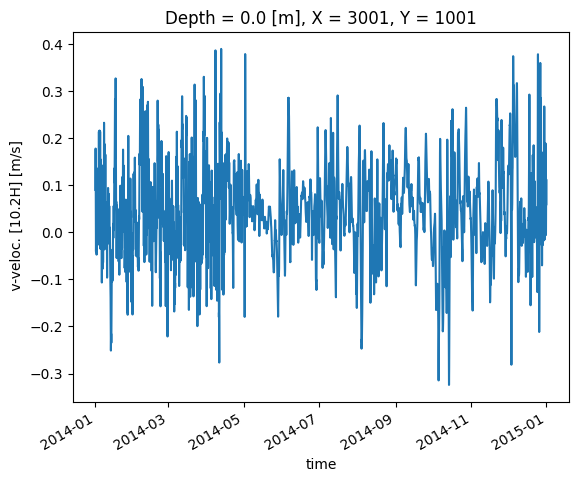

In [20]:
%%time
myds['v'].isel(Depth=0).plot()